In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt


In [13]:
df = pd.read_csv(r"hotel_booking_data.csv")

In [5]:

df['Adjusted Price'] = np.where(df['Price'] > 3000, df['Price'] * 0.9, df['Price'])


In [16]:
features_normal = ['Price', 'Month', 'Nights', 'Adults', 'Children']
X_normal = df[features_normal]
y_normal = df['Canceled']


X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X_normal, y_normal, test_size=0.3, random_state=42)


model_normal = DecisionTreeClassifier(criterion='entropy', random_state=42)
model_normal.fit(X_train_normal, y_train_normal)


y_pred_1 = model_normal.predict(X_test_normal)

In [17]:

X_adjusted = df[['Adjusted Price', 'Month', 'Nights', 'Adults', 'Children']]
y_adjusted = df['Canceled']


X_train_adjusted, X_test_adjusted, y_train_adjusted, y_test_adjusted = train_test_split(X_adjusted, y_adjusted, test_size=0.3, random_state=42)


model_adjusted = DecisionTreeClassifier(criterion='entropy', random_state=42)
model_adjusted.fit(X_train_adjusted, y_train_adjusted)


y_pred_2 = model_adjusted.predict(X_test_adjusted)


In [8]:
cancellation_rate_1 = sum(y_pred_1) / len(y_pred_1)  # % of cancellations in Model 1 (Normal Price)
cancellation_rate_2 = sum(y_pred_2) / len(y_pred_2)  # % of cancellations in Model 2 (Discounted Price)
cancellation_reduction = (cancellation_rate_1 - cancellation_rate_2) * 100  # Cancellation reduction


In [9]:
# Output results
print(f"Cancellation Rate for Model 1 (Normal Price): {cancellation_rate_1:.2f}")
print(f"Cancellation Rate for Model 2 (Discounted Price): {cancellation_rate_2:.2f}")
print(f"Cancellation Reduction: {cancellation_reduction:.2f}%")



Cancellation Rate for Model 1 (Normal Price): 0.32
Cancellation Rate for Model 2 (Discounted Price): 0.16
Cancellation Reduction: 16.50%


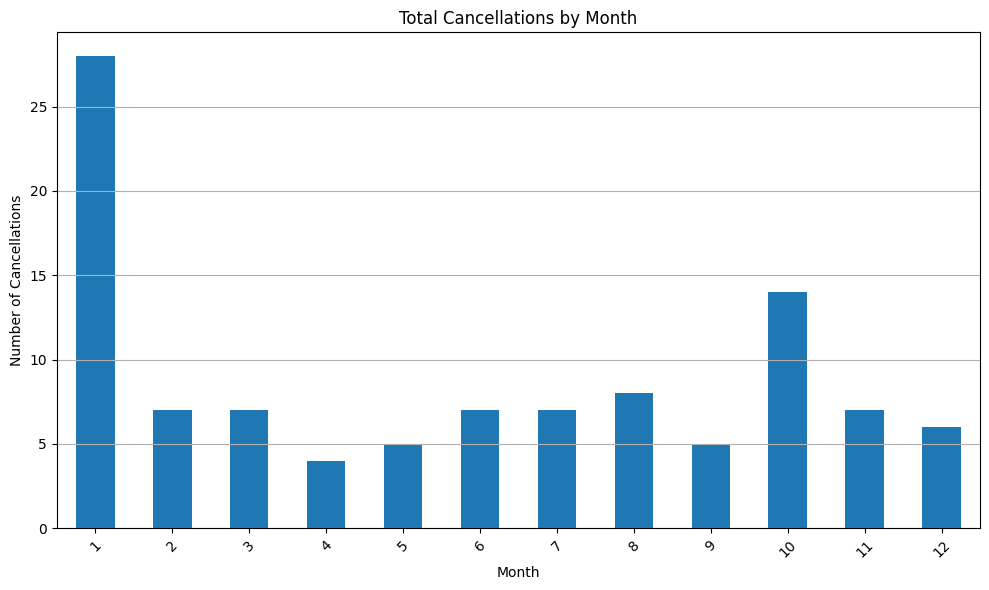

In [14]:
monthly_cancellations = df.groupby('Month')['Canceled'].sum()

plt.figure(figsize=(10, 6))
monthly_cancellations.plot(kind='bar')
plt.title('Total Cancellations by Month')
plt.xlabel('Month')
plt.ylabel('Number of Cancellations')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



In [ ]:
df